Max-Sum equations
--

\begin{align*}
u_{ai}\left(\sigma_{i}\right)= &\sigma_{i}f_{ai}+g_{ai}\\
u_{ai}\left(\sigma_{i}\right)= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}u_{ja}\left(\sigma_{j}\right)+\sigma_{j}s_{j}+const\\
b_{i}\left(\sigma_{i}\right)= & u_{ai}\left(\sigma_{i}\right)+u_{bi}\left(\sigma_{i}\right)+\sigma_{i}s_{i}+const=b_{i}\sigma_{i}+const\\
b_{i}= & \frac{1}{2}\left[f_{ai}+f_{bi}+s_{i}-\left(-f_{ai}-f_{bi}-s_{i}\right)\right]\\
= & f_{ai}+f_{bi}+s_{i}\\
\sigma_{i}f_{ai}= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}f_{ja}\sigma_{j}+\sigma_{j}s_{j}+const\\
f_{ai}= & \frac{1}{2}\left[\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)-\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=-1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)\right]\\
= & \frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}-\\
 & -\frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0
\end{cases}\\
= & \begin{cases}
\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
-\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}
\end{align*}

So we get
$$f_{ai}= \min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|\prod_{j\in\partial a\setminus i}\text{sign}\left(f_{ja}+s_{j}\right)$$


Distribution in the quenched disorder
---

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
=& \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\sum_{s_j}p\left(f_{j}+s_j\right)\\
\end{align*}

In [1]:
using OffsetArrays


function iter_slow(p,K)
    N = lastindex(p)
    p1 = copy(p)
    p1 .= 0
    S = CartesianIndices(Tuple(fill(0:1,K-1)))
    for F in CartesianIndices(Tuple(fill(-N:N,K-1)))
        ff = Tuple(F)
        P = prod(p[fi] for fi in ff)
        for fs in map(s -> ff .+ (2 .* Tuple(s) .- 1), S)
            f = minimum(abs.(fs))*sign(prod(fs))
            #println("$ff $fs $f $P")
            p1[clamp(f, -N, N)] += P
        end
    end
    p1 / sum(p1)
end

iter_slow (generic function with 1 method)

Simplifications
--

$$f = \min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^k\text{sign}\left(f_{j}+s_{j}\right)$$

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
= & \sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\frac{1}{2}\sum_{s_{j}}p\left(f_{j}-s_{j}\right)\\
= & \begin{cases}
\frac{1}{2}\sum_{f_{1},\dots,f_{k}>0}\delta\left(f;\min_{j=1,\dots,k}f_{j}\right)\prod_{j=1}^{k}\sum_{s_{j}}p\left(f_{j}-s_{j}\right) & \text{ for }f>0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s_{j}}p\left(s_{j}\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'-s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\sum_{n=0}^{k-1}\binom{k}{n}\left(\frac{1}{2}\sum_{s}p\left(s\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'+s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}
\end{align*}


In [2]:
function iter(p,K)
    k = K - 1
    p1 = copy(p)
    p1 .= 0.0
    N = lastindex(p1)-1
    for f = 1:N-1
        v1 = p[f+1]+p[f-1]
#        v2 = sum((p[f1+1]+p[f1-1] for f1=f+1:N), init=0.0)
        v2 = sum(p[f1+1]+p[f1-1] for f1=f+1:N)
        v = (v1+v2)^k-v2^k
        p1[+f] = v/2
        p1[-f] = v/2
    end
    v1 = (p[1]+p[-1])/2
    v2 = sum(p[f1+1]+p[f1-1] for f1=1:N)
    p1[0] = (v1+v2)^k-v2^k
    p1 ./ sum(p1)
end

iter (generic function with 1 method)

Comparison
--

In [3]:
N=7
N1 = 8
p=OffsetArray(zeros(2N1+1), -N1:N1);
p[-N+1:N-1] .= 1/(2N-1)
q1 = copy(p)
q2 = copy(p)

for i=1:10
    q1 = iter_slow(q1,3)
    q2 = iter(q2,3)
end
[q1[-N:N] q2[-N:N]]

15×2 Array{Float64,2}:
 1.82615e-52  0.0
 3.33866e-27  3.29725e-27
 6.99126e-14  6.97676e-14
 3.49772e-7   3.49745e-7
 0.000847722  0.000847632
 0.0399563    0.0399577
 0.245227     0.24522
 0.427938     0.427948
 0.245227     0.24522
 0.0399563    0.0399577
 0.000847722  0.000847632
 3.49772e-7   3.49745e-7
 6.99126e-14  6.97676e-14
 3.33866e-27  3.29725e-27
 1.82615e-52  0.0

In [4]:
function findsolution(k; tol=1e-15, maxiter=10^7, eq=iter, N=6)
    err = Inf
    p=OffsetArray(zeros(2N+3), -N-1:N+1);
    p[-N+1:N-1] .= 1/(2N+1)
    p ./= sum(p);
    for i = 1:maxiter
        (err <= tol) && break
        q = eq(p,k)
        err = maximum(abs.(q-p))
        p = 0.1q + 0.9p
    end
    @show k, err
    p
end

findsolution (generic function with 1 method)

Free Energy
--

\begin{align*}
-F_{a} & =\frac{1}{\beta}\log\sum_{\sigma:sat}\prod_{i\in\partial a}\frac{e^{\beta\left(f_{bi}+s_{i}\right)\sigma_{i}}}{2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma:sat}e^{\beta\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}}-\frac{1}{\beta}\sum_{i\in\partial a}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\max_{\sigma:sat}\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}-\sum_{i\in\partial a}\left|f_{bi}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
-F_{i} & =\frac{1}{\beta}\log\sum_{\sigma_{i}}\frac{e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}}{2\cosh\left(\beta f_{ai}\right)2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma_{i}}e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}-\frac{1}{\beta}\log2\cosh\left(\beta f_{ai}\right)-\frac{1}{\beta}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\left|f_{ai}+f_{bi}+s_{i}\right|-\left|f_{ai}\right|-\left|f_{bi}\right|\\
F &= \sum_{a}F_{a}-\sum_{i}F_{i}
\end{align*}

So we get the overlap:

$$O=-F= -\sum_{a}F_{a}+\sum_{i}F_{i}$$


In [5]:
function overlap_slow(p,K)
    N = lastindex(p)
    O = 0.0
    S = CartesianIndices(Tuple(fill(0:1,K)))
    for ff in map(Tuple, CartesianIndices(Tuple(fill(-N:N,K))))
        P = prod(p[fi] for fi in ff) / 2^K
        for fs in map(s -> ff .+ (2 .* Tuple(s) .- 1), S)
            O += P*sum(abs.(fs))
            if prod(fs) < 0
                O -= P*2*minimum(abs.(fs))
            end
        end
    end
    O *= 2/K
    for f1=-N:N
        for f2=-N:N
            for s = (-1,1)
                O -= p[f1]*p[f2]*0.5*(abs(f1+f2+s))
            end
        end
    end
    O
end

overlap_slow (generic function with 1 method)

Simplifications for the overlap
--

* On a single instance (by rearranging the sums)

\begin{align*}
O&=-\frac{1}{n}\sum_{a=1}^m\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|+\frac{1}{n}\sum_{i=1}^n\left(|f_{bi}+s_i|+|f_{ai}+s_i|-|f_{ai}+f_{bi}+s_i|\right)
\end{align*}
that one can re-write
\begin{align*}
O&=\frac{1}{n}\sum_{i=1}^nF(f_{ai},f_{bi},s_i)+\frac{1}{n}\sum_{a=1}^m G(\{f_{bi}\}_{i\in\partial a};|\partial a|)
\end{align*}

* Averaging over the graph and source (for an arbitrary factor degree profile $P(X)$)
\begin{align*}
O^{RS} &= \sum_s\frac{1}{2}\sum_{f_1,f_2}\left(|f_1+s|+|f_2+s|-|f_1+f_2+s|\right)p(f_1)p(f_2) \\
&- \frac{2}{P'(1)}\sum_{k=0}^{\infty}P_k\sum_{f_1,\dots,f_k}\sum_{s_1,\dots,s_k}\frac{1}{2^k}\Theta\left(-\prod_{i=1}^k\left(f_i+s_i\right)\right)2\min_{i=1,\dots,k}\left|f_i+s_i\right|\prod_{i=1}^k p(f_i)\\
\end{align*}
The factor $2/P'(1)$ is the number of factors per variables $\alpha=m/n=2/P'(1)$ : in the RS approximation, each term $G(\{f_{bi}, s_i\}, |\partial a|)$ in the sum $(1/n)\sum_{a=1}^m G(\{f_{bi}, s_i\}, |\partial a|)$ over the factors has the same contribution, and there is $m$ terms in the sum, therefore we obtain the contribution $\alpha\mathbb{E}[G(\{f_i,s_i\}_{i=1,\dots,k}; k)]$. The average is taken over the random variables, $k$ is drawn from $P_k$; $f_1,\dots f_k$ are drawn from $p(f)$ i.i.d., and $s_1,\dots,s_k$ are $\pm 1$ uniformly and i.i.d.

* The second term can be simplified:
\begin{align*}
&\sum_{f_1,\dots,f_k}\sum_{s_1,\dots,s_k}\frac{1}{2^k}\Theta\left(-\prod_{i=1}^k\left(f_i+s_i\right)\right)2\min_{i=1,\dots,k}\left|f_i+s_i\right|\prod_{i=1}^k p(f_i)\\
=& \sum_{f_1,\dots,f_k} \Theta\left(-\prod_{i=1}^k f_i\right)2\min_{i=1,\dots,k}|f_i|\prod_{i=1}^k\left(\sum_{s_i}\frac{1}{2}p(f_i-s_i)\right)\\
=& \sum_{f_1,\dots,f_k>0}\min_{i=1,\dots,k}(f_i)\prod_{i=1}^k\left(\sum_{s_i}p(f_i-s_i)\right)\\
=& \sum_{f>0}f\sum_{n=1}^k{k\choose n}\left(\sum_s p(f-s)\right)^n\left(\sum_{f'>f}\sum_s p(f'-s)\right)^{k-n} \\
=& \sum_{f>0}f\left\{ \left(\sum_{f'\geq f}\sum_s p(f'-s)\right)^k - \left(\sum_{f'>f}\sum_s p(f'-s)\right)^k\right\}
\end{align*}

RS equations for an arbitrary factor degree profile $P(X)$
--

\begin{align*}
p\left(f\right)=\sum_{k=0}^{\infty}\tilde{P_k}\frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)
\end{align*}
with the residual degree profile 
\begin{align*}
\tilde{P_k}=\frac{(k+1)P_{k+1}}{P'(1)}
\end{align*}
which is the the probability distribution, for a factor node reached by following an edge, of the number of other edges attached to that node.
Using the simplifications below:
\begin{align*}
p\left(f\right)=\sum_{k=0}^{\infty}\tilde{P_k}\begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}
\end{align*}

In [6]:
using OffsetArrays

function overlap_variables(p)# first term in the expression of the overlap (sum over variables)
    O = 0.0
    N = lastindex(p)-1
    for f1=-N:N
        for f2=-N:N
            for s = (-1,1)
                O += p[f1]*p[f2]*0.5*(abs(f1+s)+abs(f2+s)-abs(f1+f2+s))
            end
        end
    end
    O
end
function overlap_factors(p,k) #second term, at fixed k
    O = 0.0
    N = lastindex(p)-1
    for f = 1:N-1
        v1 = p[f+1]+p[f-1]
        v2 = sum(p[f1+1]+p[f1-1] for f1=f+1:N)
        v = (v1+v2)^k-v2^k
        O += f*v
    end
    O
end

function overlap_fixeddeg(p,k)
    O=overlap_variables(p)-(2/k)*overlap_factors(p,k)
    O
end

overlap_fixeddeg (generic function with 1 method)

In [7]:
p=findsolution(3)
[overlap_slow(p,3) overlap_fixeddeg(p,3)]

(k, err) = (3, 9.43689570931383e-16)


1×2 Array{Float64,2}:
 0.580759  0.580759

In [8]:
distortion(K; kwdargs...) = (1-overlap_fixeddeg(findsolution(K; kwdargs...), K))/2

distortion (generic function with 1 method)

In [9]:
Ks = 3:10
D = distortion.(Ks)
R = 1 .- 2 ./ Ks

[R D]

(k, err) = (3, 9.43689570931383e-16)
(k, err) = (4, 9.992007221626409e-16)
(k, err) = (5, 8.881784197001252e-16)
(k, err) = (6, 9.992007221626409e-16)
(k, err) = (7, 9.992007221626409e-16)
(k, err) = (8, 8.881784197001252e-16)
(k, err) = (9, 9.992007221626409e-16)
(k, err) = (10, 9.992007221626409e-16)


8×2 Array{Float64,2}:
 0.333333  0.209621
 0.5       0.141487
 0.6       0.105593
 0.666667  0.0830604
 0.714286  0.0676468
 0.75      0.0565155
 0.777778  0.0481531
 0.8       0.0416759

In [10]:
R = 1 .- 2 ./ Ks

8-element Array{Float64,1}:
 0.33333333333333337
 0.5
 0.6
 0.6666666666666667
 0.7142857142857143
 0.75
 0.7777777777777778
 0.8

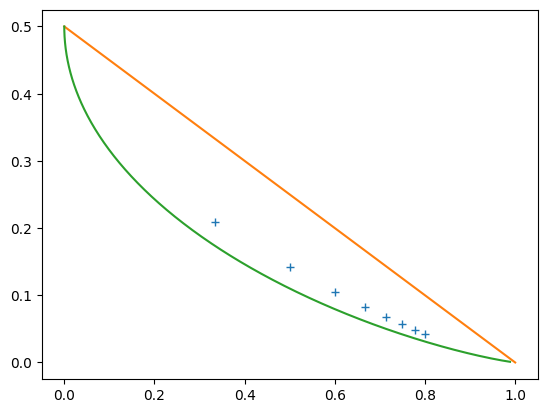

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facca198860>

In [11]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)

#xlim(0,1)
#ylim(0,0.5)
plot(R,D, "+")
plot((0,1),(0.5,0))
plot(H.(0:0.001:0.5), 0:0.001:0.5)

In [12]:
function mixed(pk; maxiter=10^7, tol=1e-15, N=6, damp=0.9)
    N1 = N + 1
    p=OffsetArray(zeros(2N1+1), -N1:N1);
    p[-N+1:N-1] .= 1/(2N-1)
    krange = [k for k in eachindex(pk) if pk[k] > tol]
    @assert sum(pk[krange]) ≈ 1
    z = sum(k*pk[k] for k=krange)
    for i=1:maxiter
        p1 = sum(k*pk[k]*iter(p,k) for k=krange)/z
        if sum(abs.(p1 - p)) < tol
            break
        end
        p = p*damp+p1*(1-damp)
    end
    O = overlap_variables(p) - (2/z)*sum(pk[k]*overlap_factors(p,k) for k=krange)
    D = (1-O)/2
end

mixed (generic function with 1 method)

In [13]:
function mixture2(R) 
    α=1-R
    k=floor(Int, 2/α)
    s=k+1-2/α
    p=[fill(0,k-1); s; 1-s]
    p .*= p .> 1e-10
    p ./ sum(p)
end


mixture2 (generic function with 1 method)

In [14]:
Rm = 0.01:0.01:0.99
pks = mixture2.(Rm)
αs = 2 ./ [sum(k*pk[k] for k=eachindex(pk)) for pk in pks]
@assert Rm ≈ 1 .- αs
Dm = mixed.(pks, N=30)

99-element Array{Float64,1}:
 0.4546474073128681
 0.43565049932361133
 0.42092765046912317
 0.40839439222208573
 0.3972457420215144
 0.3870702443196218
 0.3776242651788484
 0.36874955806591975
 0.3603365352601175
 0.3523056385673838
 0.34459697668198624
 0.33716414626734653
 0.3299703418625086
 ⋮
 0.020370784947590925
 0.017979055383501308
 0.015666129177374533
 0.013449978144655372
 0.0113201258591068
 0.009302254807509736
 0.007397829094439923
 0.0056264302423451595
 0.004010648891537405
 0.002577264143732827
 0.0013672330158682189
 0.0004509986577261871

In [46]:
include("../code/headers.jl")

In [54]:
seed = 1234
n = factorial(7)*2
R = 0.21:0.05:0.81
m_ = n*(1 .- R)
nrates = length(m_)
m = round.(Int,m_)
ms = MS(maxiter=1000, convergence=:parity, Tmax=1, gamma=5e-3, sigma=1e-10)
res_MS = Vector{BPResults{MS}}(undef,nrates);
avg_dist = zeros(nrates)
navg = 10;

In [55]:
for j in eachindex(m)
    println("## Rate $(round(R[j],digits=2)). $j of $(length(m))")
    for i in 1:navg
        lm = LossyModel(Val(2), n, m[j], randseed=seed+i)
        res_MS[j] = solve!(lm, ms, randseed=seed, verbose=true, showprogress=false)
        avg_dist[j] += res_MS[j].distortion 
    end
    avg_dist[j] /= navg
end

## Rate 0.21. 1 of 13
U after 1000 iters, 1 trials. Parity   4. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
C after 108 iters, 1 trials. Parity   0. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
U after 1000 iters, 1 trials. Parity   2. Dist 0.28.
## Rate 0.26. 2 of 13
U after 1000 iters, 1 trials. Parity   2. Dist 0.25.
U after 1000 iters, 1 trials. Parity   6. Dist 0.25.
U after 1000 iters, 1 trials. Parity   4. Dist 0.25.
C after  70 iters, 1 trials. Parity   0. Dist 0.25.
U after 1000 iters, 1 trials. Parity   2. Dist 0.26.
U after 1000 iters, 1 trials. Parity   2. Dist 0.25.
C after  95 iters, 1 trials. Parity   0. Dist 0.25.
U after 1000 iters, 1 trials. Parity   4. Dist 0.25.
C aft

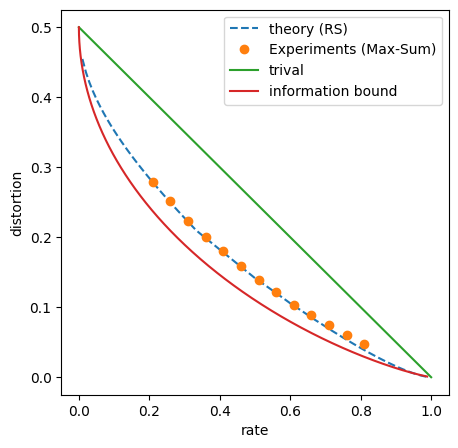

Max-Sum distortion are averages over 10 instances


In [56]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)

dist_exp = avg_dist
println("Max-Sum distortion are averages over ", navg, " instances")

#xlim(0,1)
#ylim(0,0.5)
#plot(R,D, "x", label="RS RRG")
fig, ax = subplots(figsize=(5,5))
xlabel("rate")
ylabel("distortion")
PyPlot.plot(Rm,Dm, "--", label="theory (RS)")
PyPlot.plot(R, dist_exp, "o", label="Experiments (Max-Sum)")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(H.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
legend()
PyPlot.savefig("rs_vs_ms.png")